In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle
import os
from scipy.signal import find_peaks
from src.s3_utils import pandas_from_csv_s3
from src.utils import data_load
# %matplotlib notebook
%matplotlib inline

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-5es1rn_8 because the default path (/home/ubuntu/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
keys = {'birth'}
data = data_load(data_keys=keys, wave=5)
birth_list = ['user_id', 'birth_date', 'birth_scheduled', 'birth_gestage']
birth_df = data['birth'][birth_list]
birth_df['birth_date'] = pd.to_datetime(birth_df['birth_date'])

In [3]:
def plot_last_cps(last_cp_lst, title, feature_name):
    max_val, min_val = max(last_cp_lst) + 1, min(last_cp_lst)
    bin_num = max_val - min_val
    fig, ax1 = plt.subplots()
    fig.set_size_inches(20.5, 10.5)
    ax = sns.histplot(last_cp_lst, kde=True, bins=bin_num)
    ax.set_xlim(0, max_val)
    ax.set_xlabel('Number of Day(s) Before Delivery Date')
    ax.set_ylabel('Number of Users')
    for i, p in enumerate(ax.patches):
        ax.annotate(f'{feature_name[i]}\n',
                    (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', color='crimson', fontsize=8)
    ax.set_xticks(range(0, max_val))
    plt.title(title)
    plt.show()
    

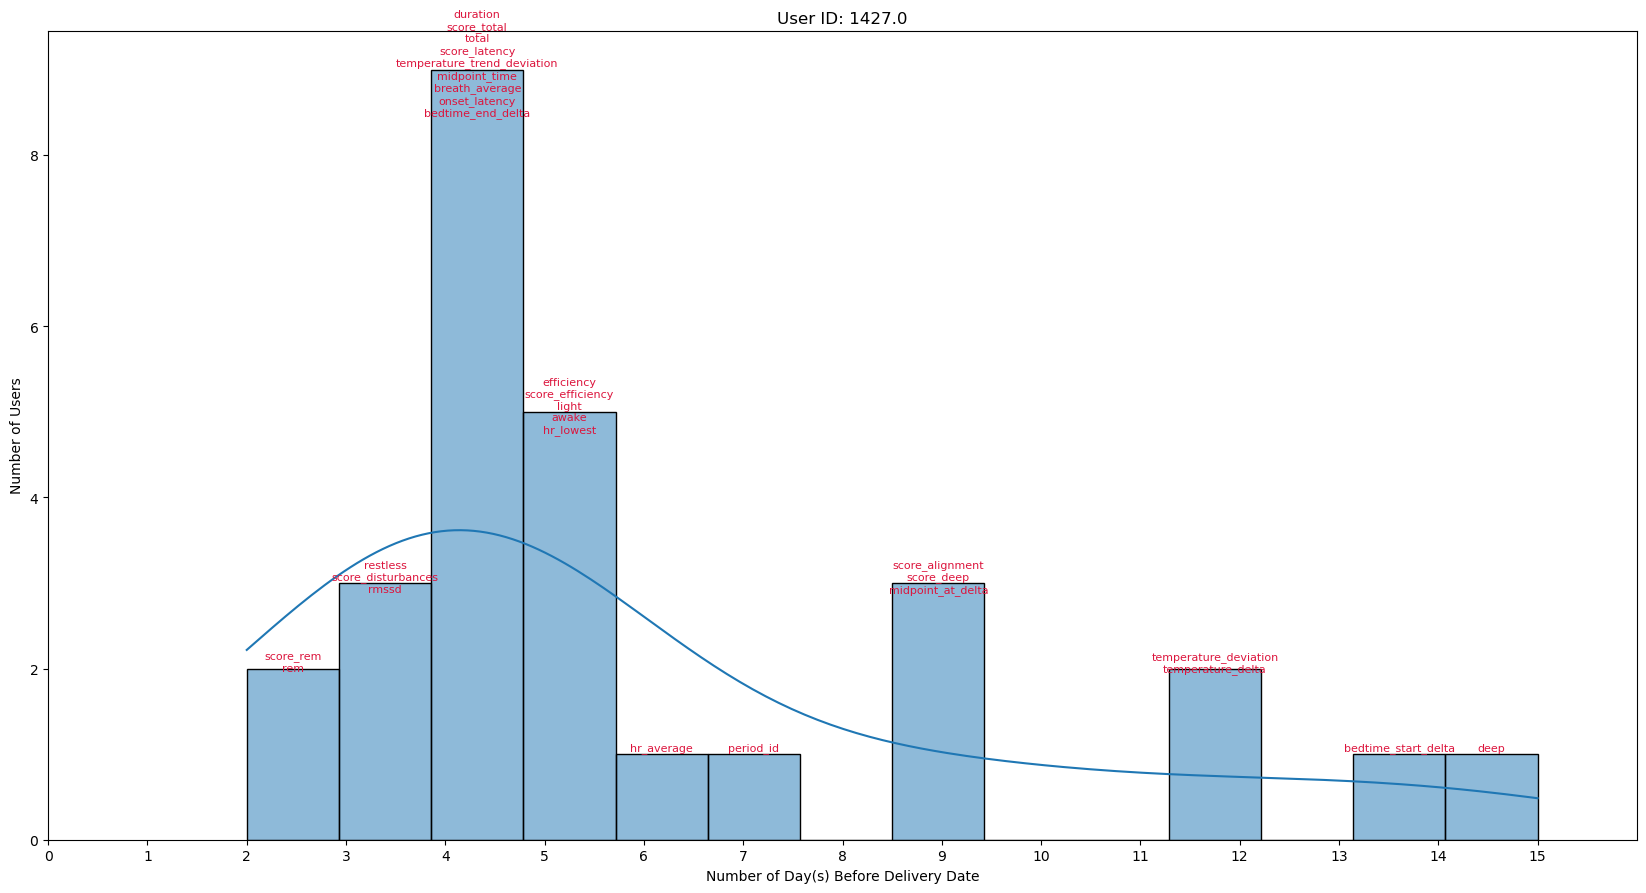

In [8]:
# 1=scheduled, 2=unscheduled, 3=unsure
rootdir = '/repos/TiVaCPD/TiVaCPD/out2'
for user_folder in os.listdir(rootdir):
    uid = float(user_folder.split('_')[2])
    dir = os.path.join(rootdir, user_folder)
    birth_info = birth_df.loc[birth_df['user_id'] == uid]
    last_cp_lst = []
    feature_dict = {}
    for file in os.listdir(dir):
        if file.endswith('mmd_score_0.pkl'):
            feature_name = file.split('_mmd')[0]
            filename = os.path.join(dir, file)
            mmd_score = pickle.load(open(filename, 'rb'))
            peaks, _ = find_peaks(mmd_score)
            if len(peaks) > 0:
                last_peak = 60 - peaks[-1]
                last_cp_lst.append(int(last_peak))
                if last_peak in feature_dict:
                    feature_dict[last_peak].append(feature_name)
                else:
                    feature_dict[last_peak] = [feature_name]
            # else:
            #     plt.plot(mmd_score)
            #     plt.plot(peaks, mmd_score[peaks], "x")
            #     plt.title(f'User ID: {uid}, Feature: {feature_name}')
            #     plt.show()
    feature_dict_sort = dict(sorted(feature_dict.items()))
    feature_lst = []
    for i in range(min(last_cp_lst), max(last_cp_lst) + 1):
        if i in feature_dict_sort:
            feature_lst.append('\n'.join(feature_dict_sort[i]))
        else:
            feature_lst.append('')
    title = f'User ID: {uid}'
    plot_last_cps(last_cp_lst, title, feature_lst)
    break

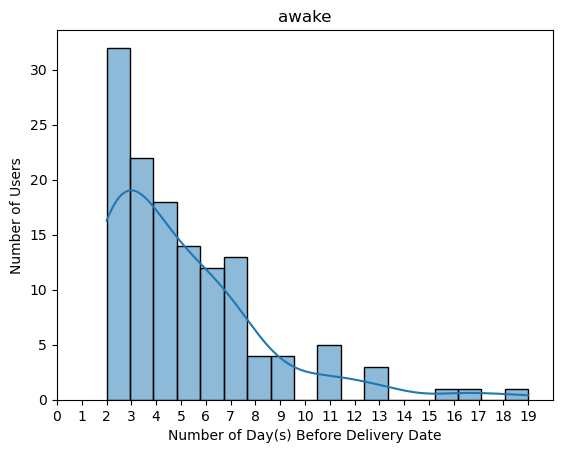

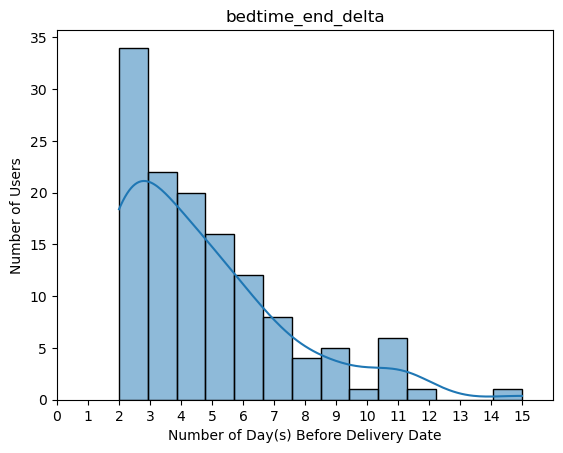

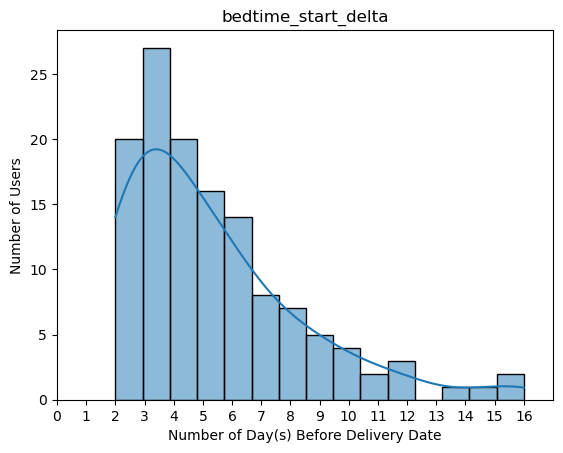

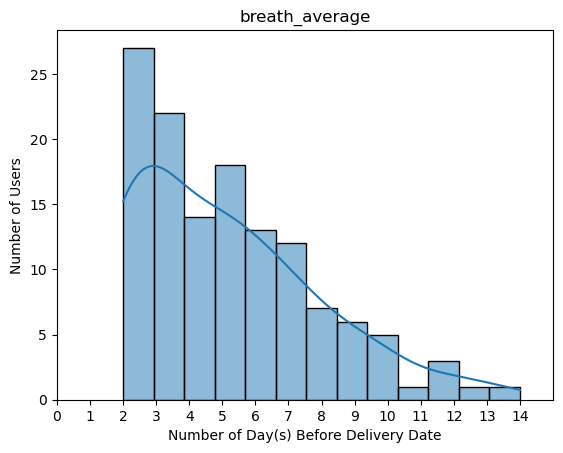

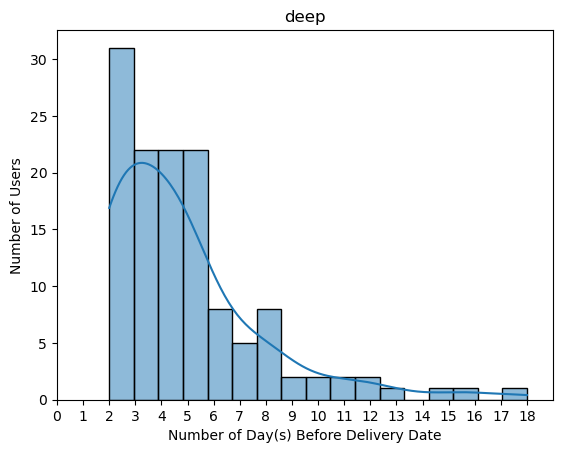

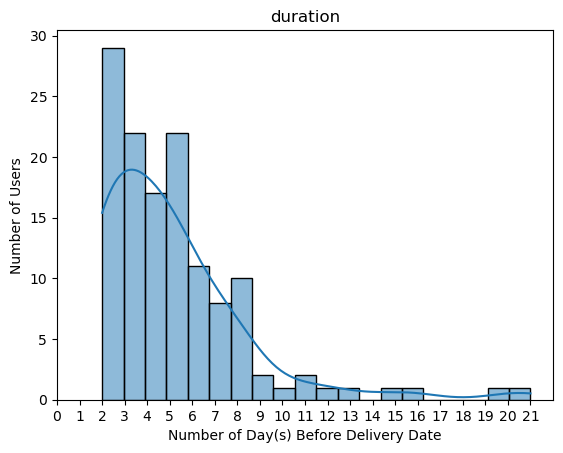

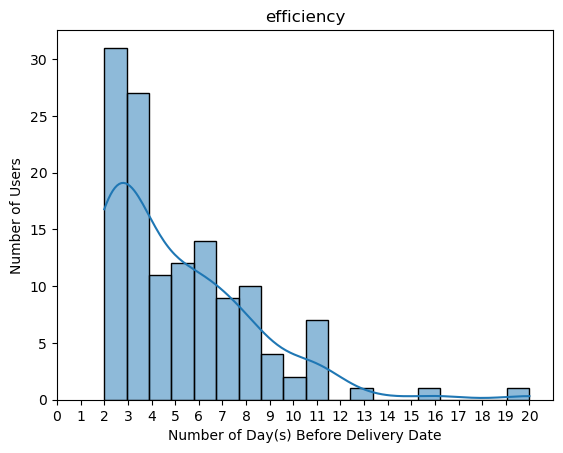

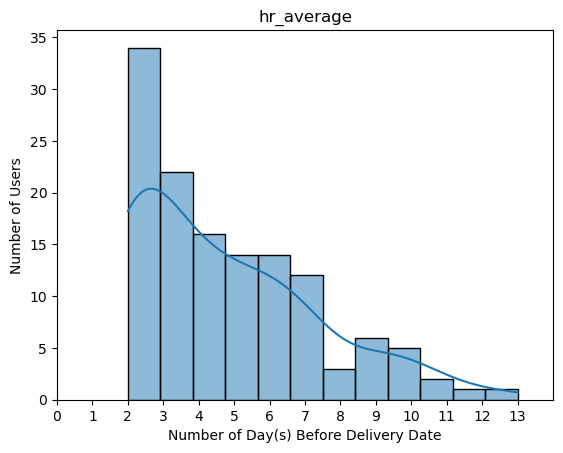

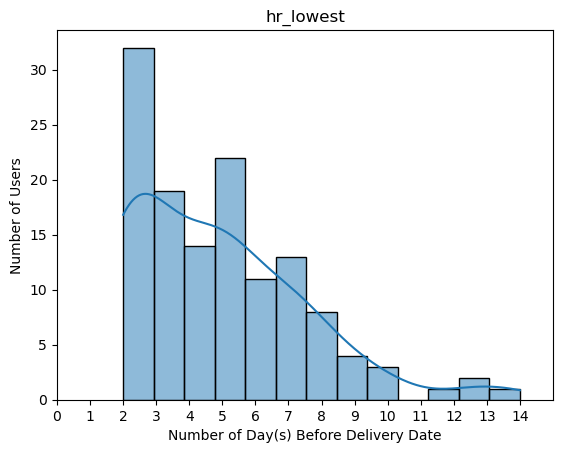

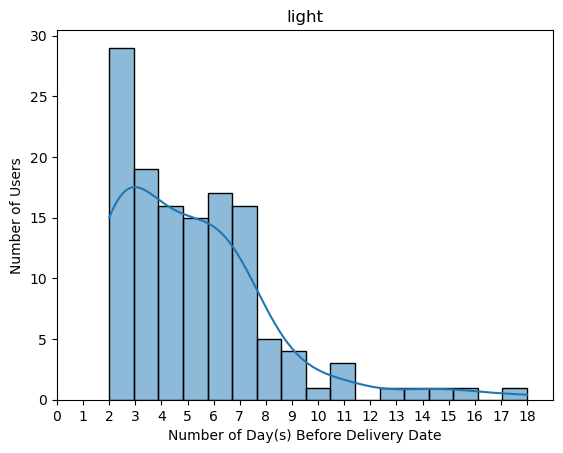

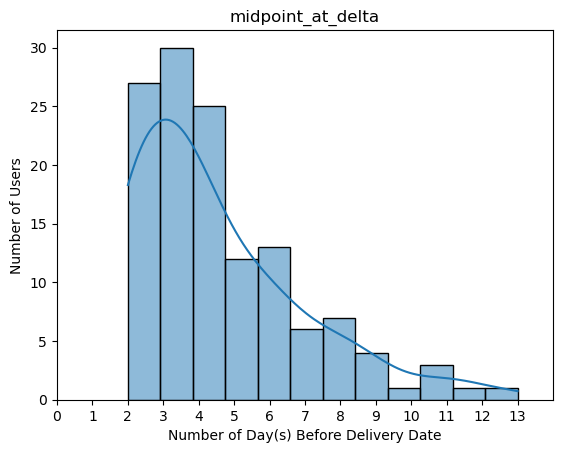

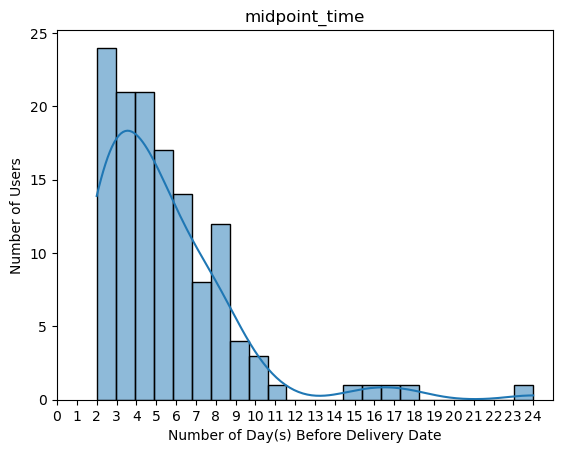

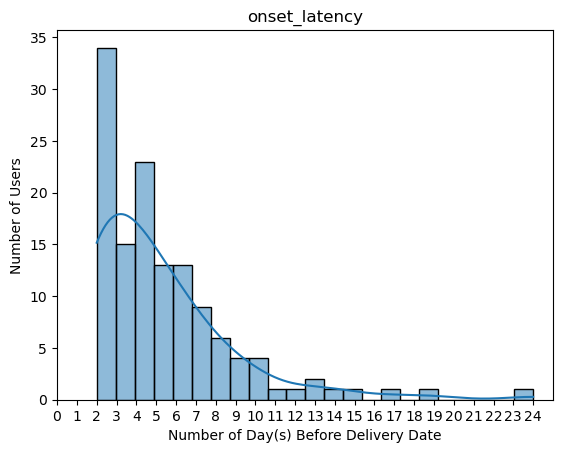

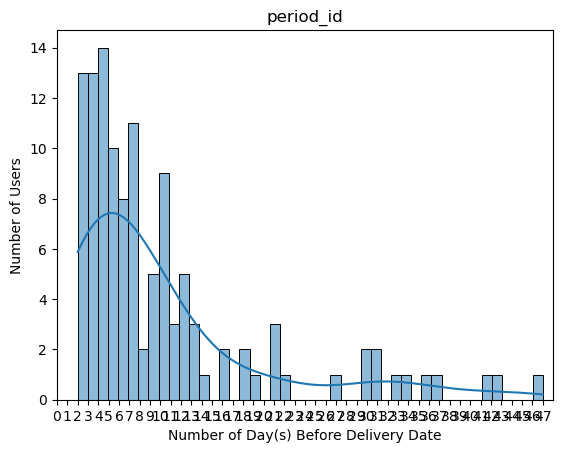

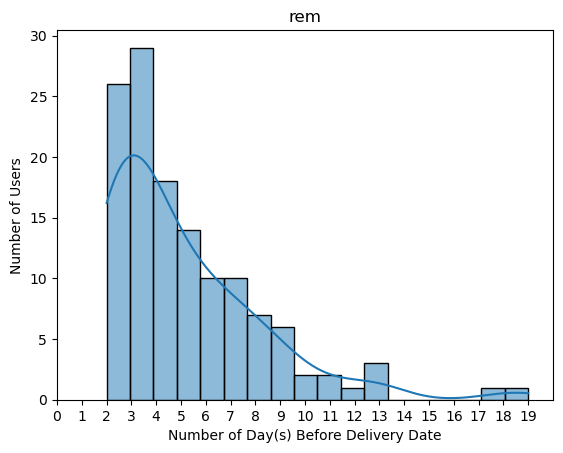

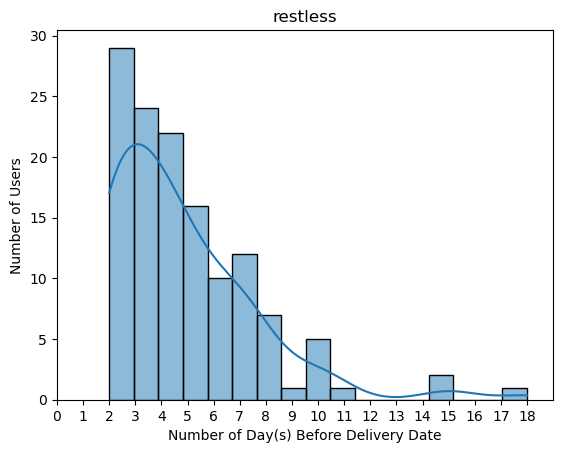

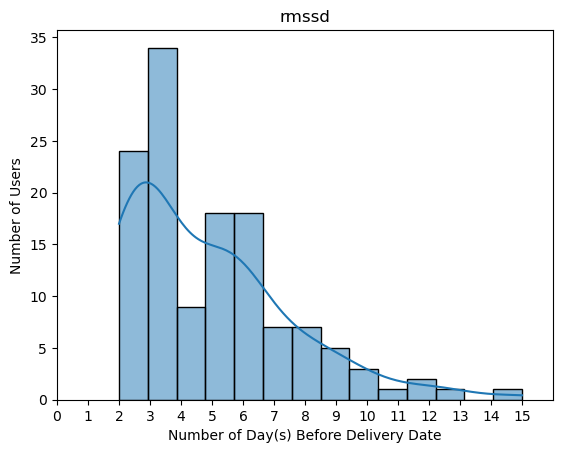

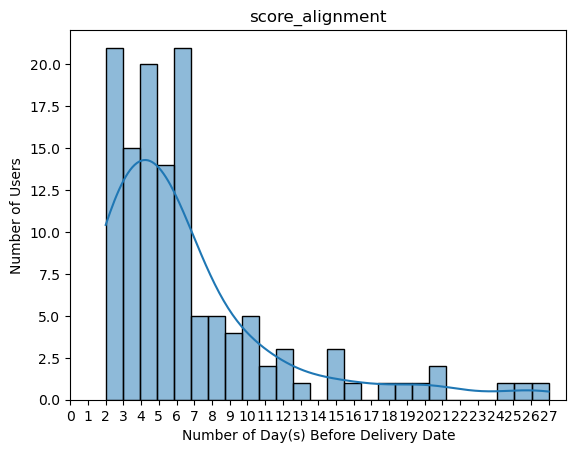

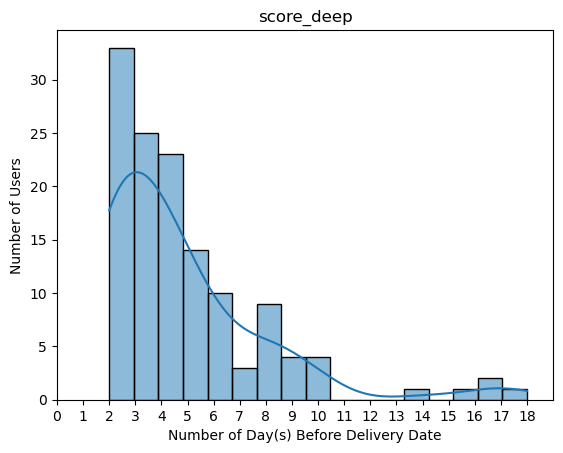

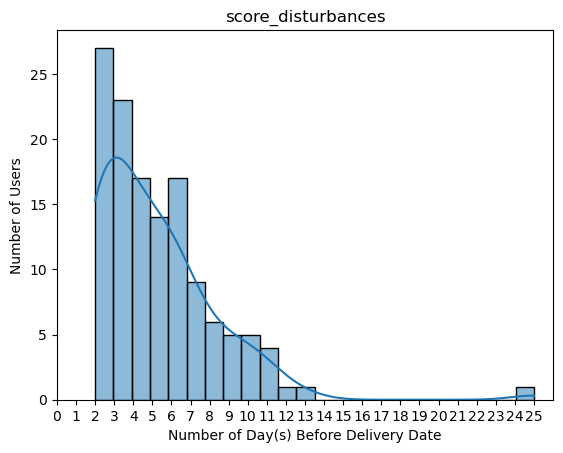

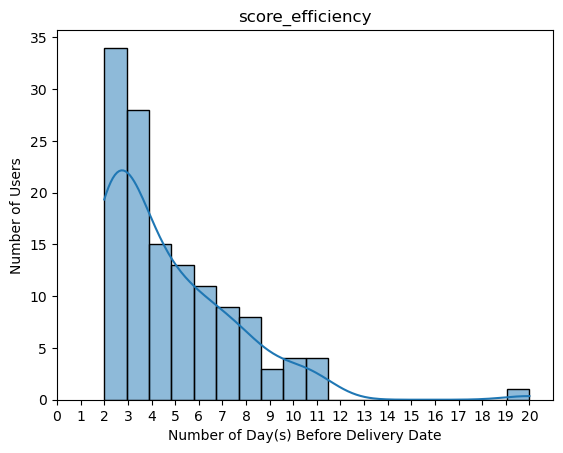

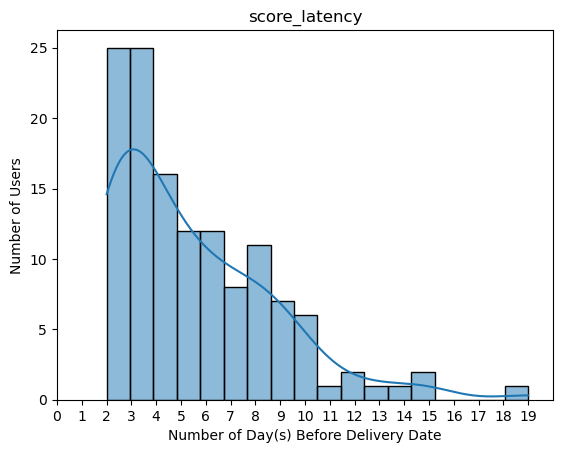

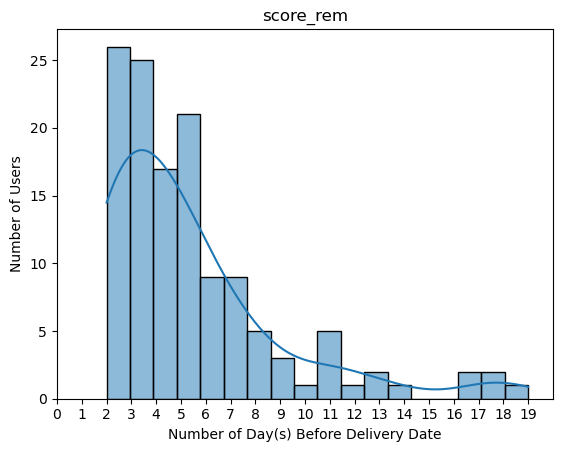

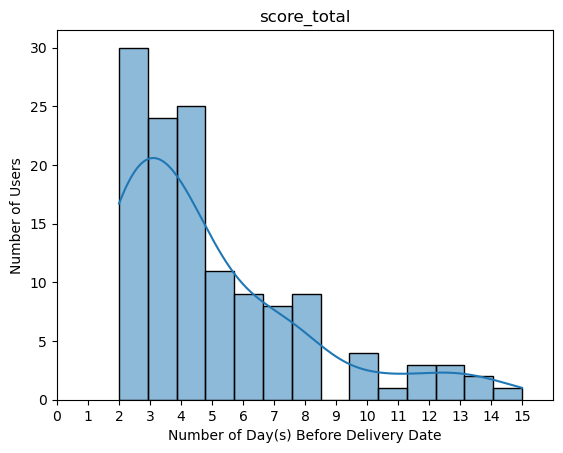

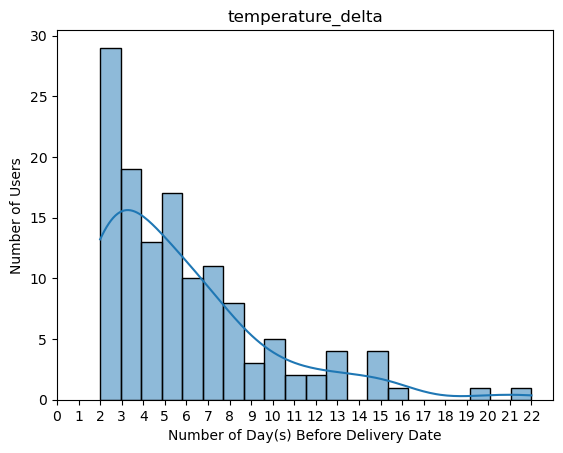

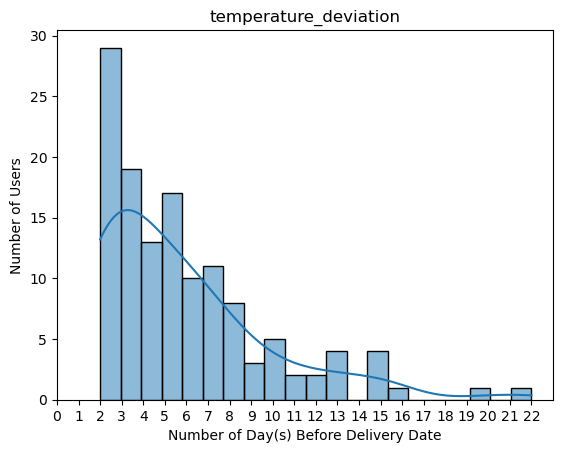

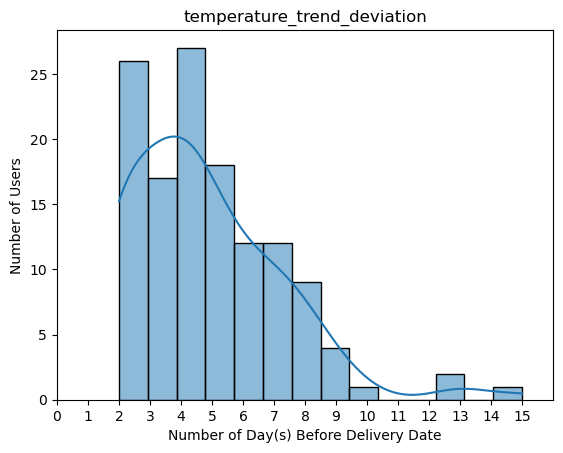

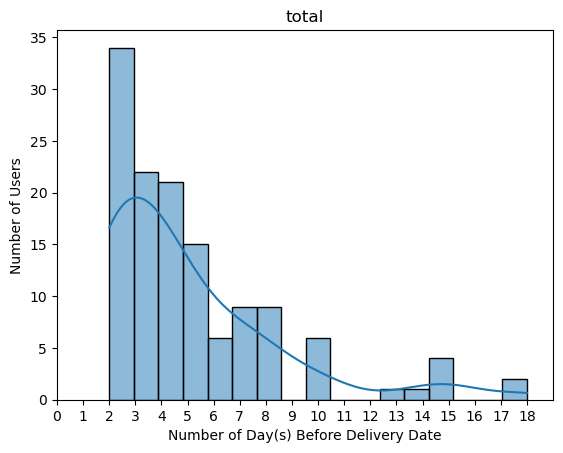

In [6]:
oura_sleep_list = ['awake', 'bedtime_end_delta', 'bedtime_start_delta', 'breath_average', 'deep', 'duration', 'efficiency', 'hr_average', 'hr_lowest', 'light', 'midpoint_at_delta', 'midpoint_time', 'onset_latency', 'period_id', 'rem', 'restless', 'rmssd', 'score_alignment', 'score_deep', 'score_disturbances', 'score_efficiency', 'score_latency', 'score_rem', 'score_total', 'temperature_delta', 'temperature_deviation', 'temperature_trend_deviation', 'total']

rootdir = '/repos/TiVaCPD/TiVaCPD/out2'
for feature in oura_sleep_list:
    feature_cp_lst = []
    for user_folder in os.listdir(rootdir):
        uid = float(user_folder.split('_')[2])
        dir = os.path.join(rootdir, user_folder)
        birth_info = birth_df.loc[birth_df['user_id'] == uid]
        birth_schedule = int(birth_info['birth_scheduled'].iloc[0])
        # if birth_schedule == 1:
        filename = os.path.join(dir, f'{feature}_mmd_score_0.pkl')
        mmd_score = pickle.load(open(filename, 'rb'))
        peaks, _ = find_peaks(mmd_score)
        if len(peaks) > 0:
            last_peak = 60 - peaks[-1]
            feature_cp_lst.append(int(last_peak))
    max_val, min_val = max(feature_cp_lst) + 1, min(feature_cp_lst)
    bin_num = max_val - min_val
    fig, ax1 = plt.subplots()
    # fig.set_size_inches(20.5, 10.5)
    ax = sns.histplot(feature_cp_lst, kde=True, bins=bin_num)
    ax.set_xticks(range(0, max_val))
    ax.set_xlim(0, max_val)
    ax.set_xlabel('Number of Day(s) Before Delivery Date')
    ax.set_ylabel('Number of Users')
    plt.title(feature)
    plt.show()

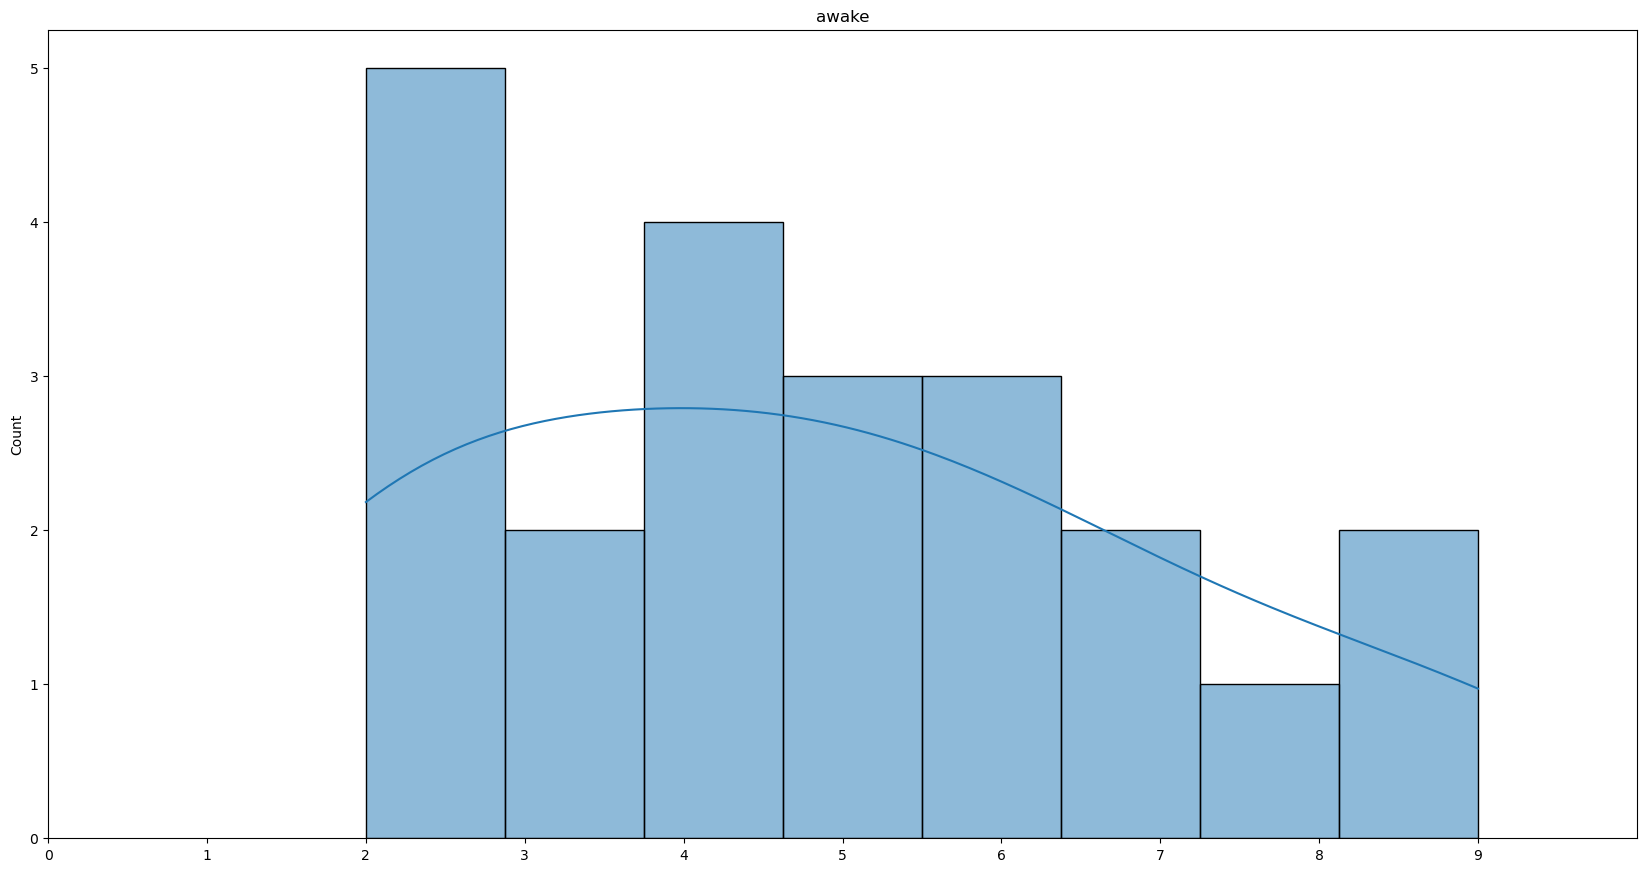

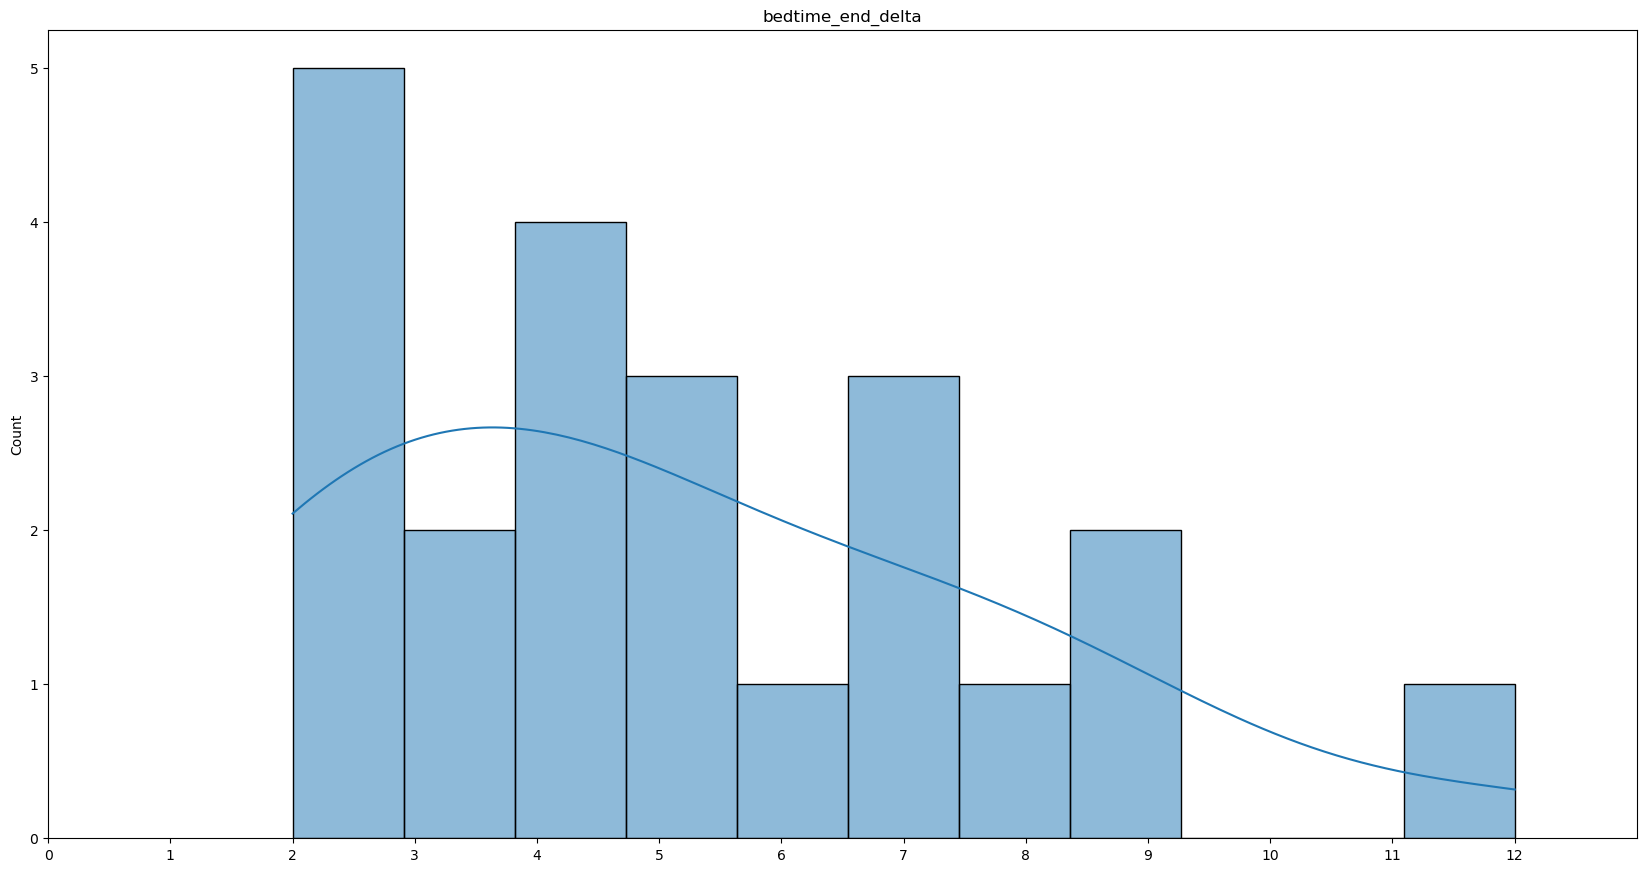

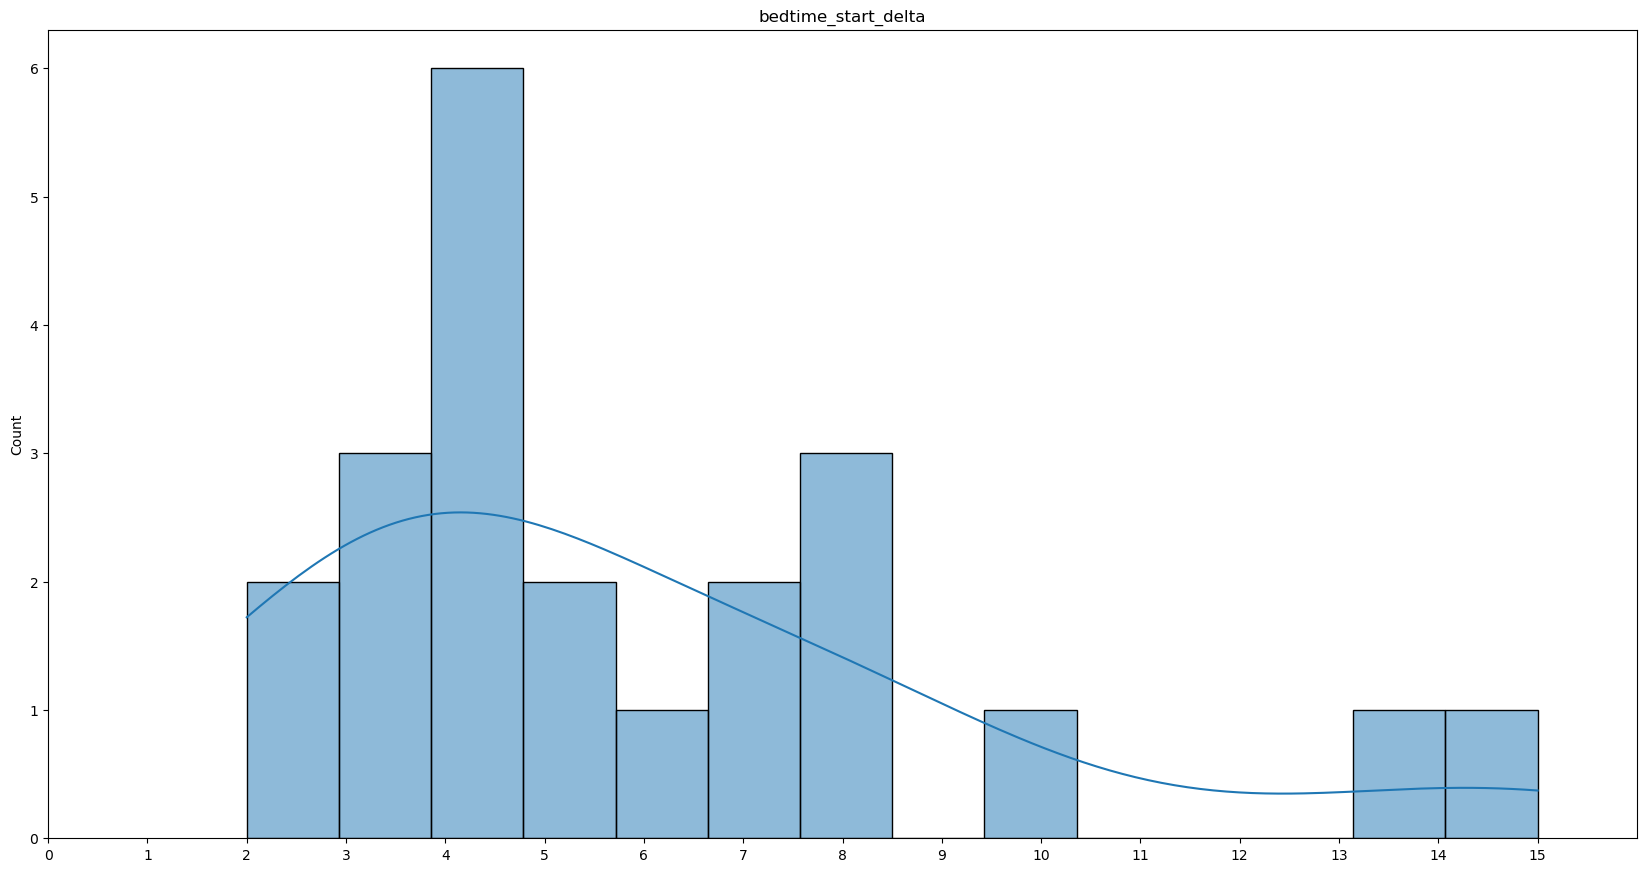

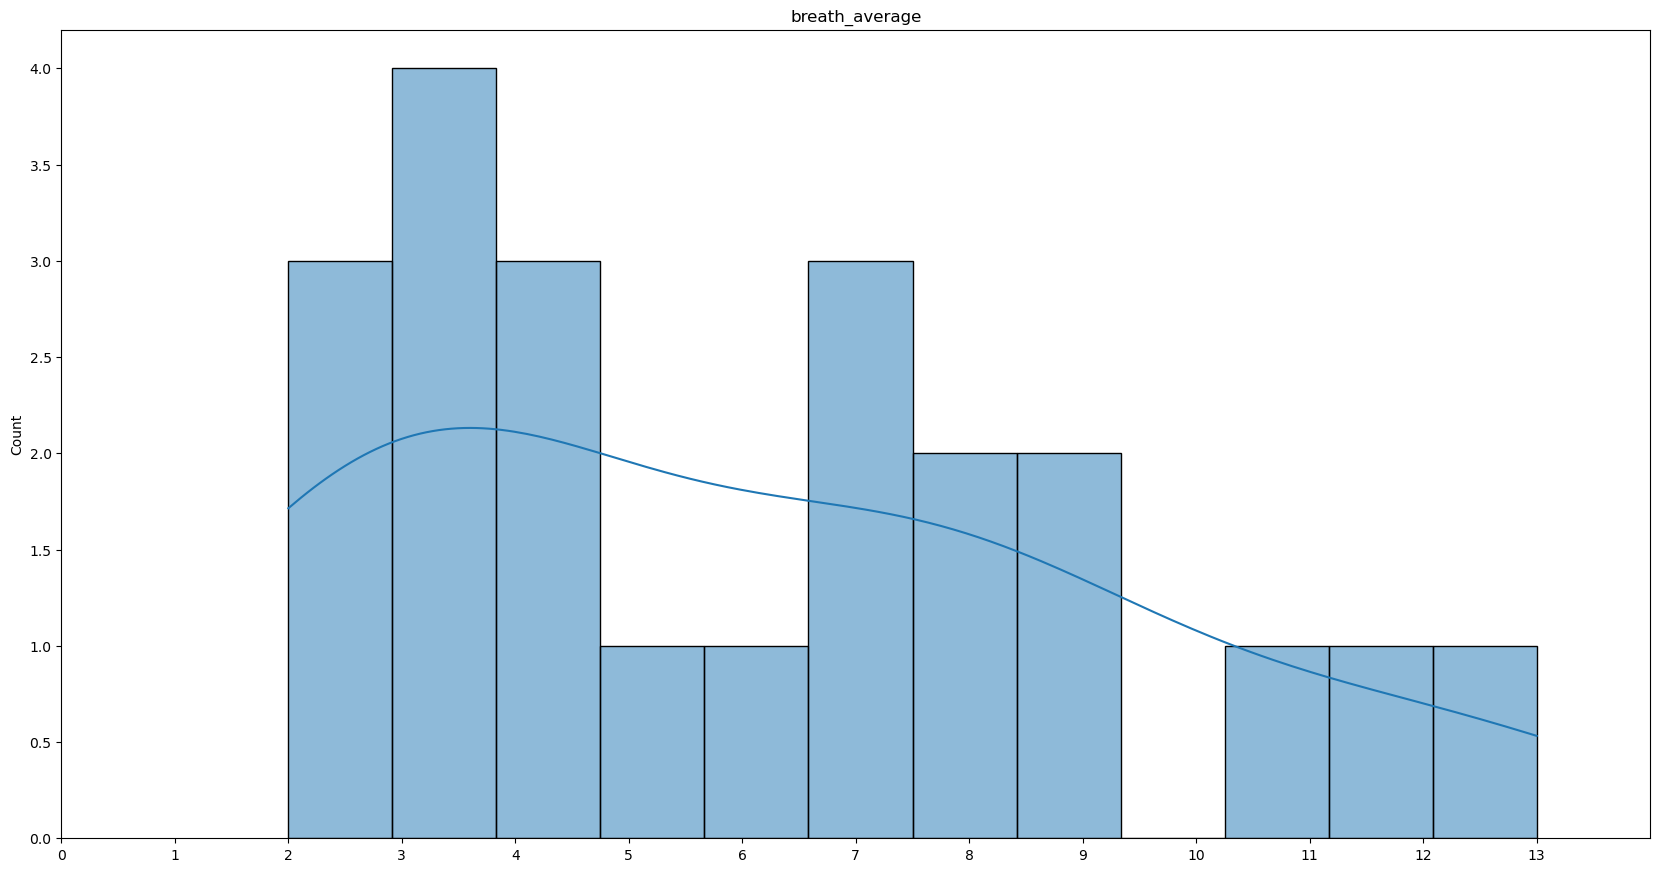

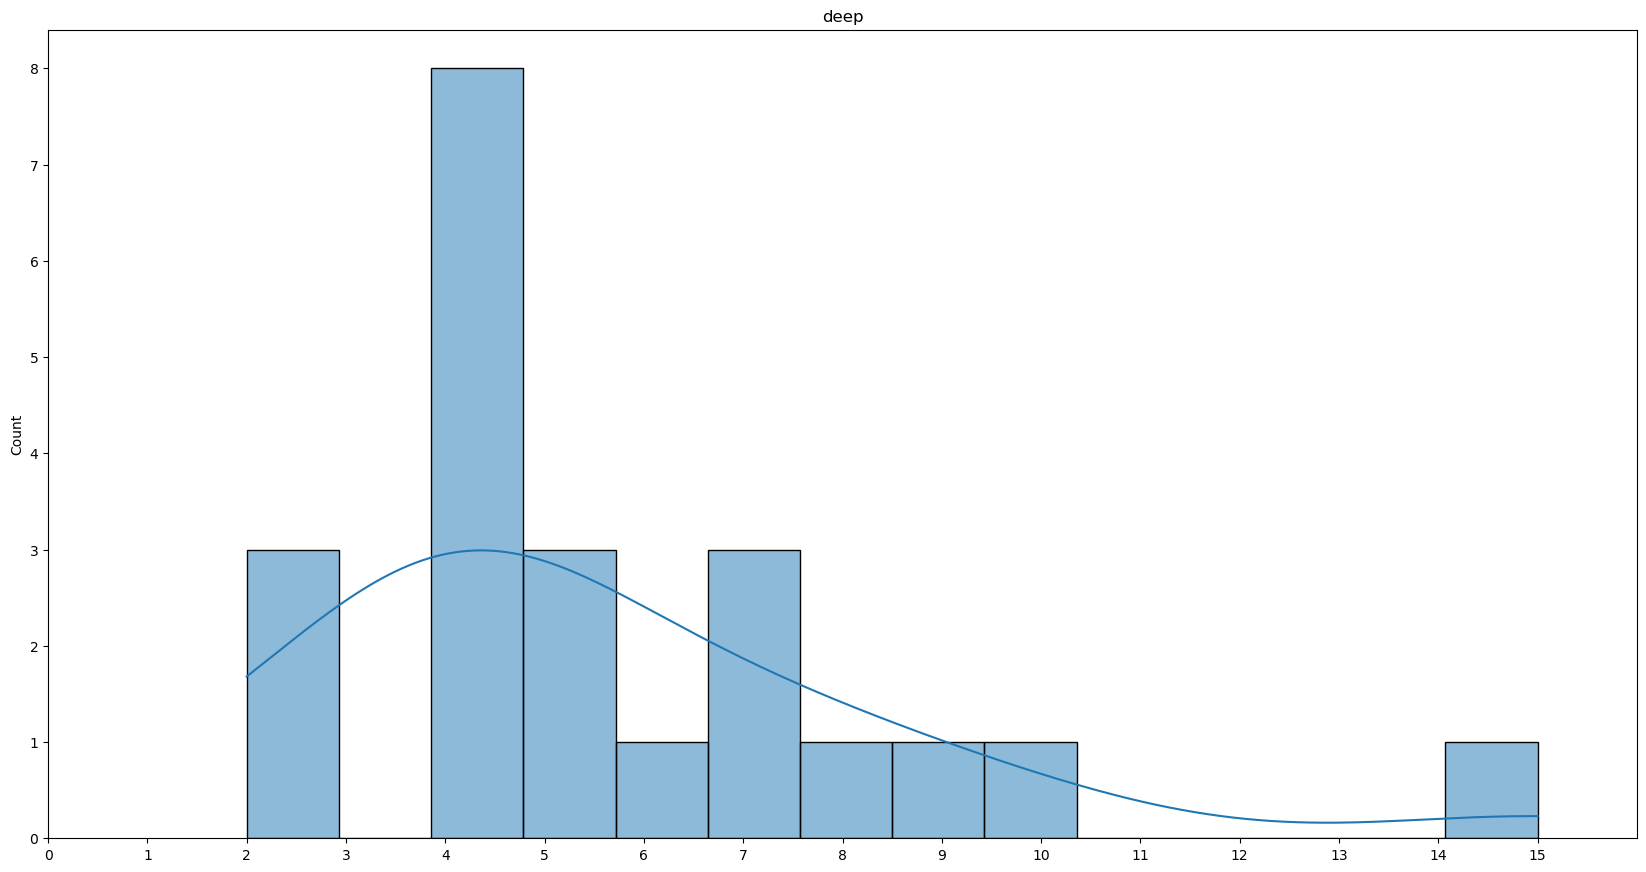

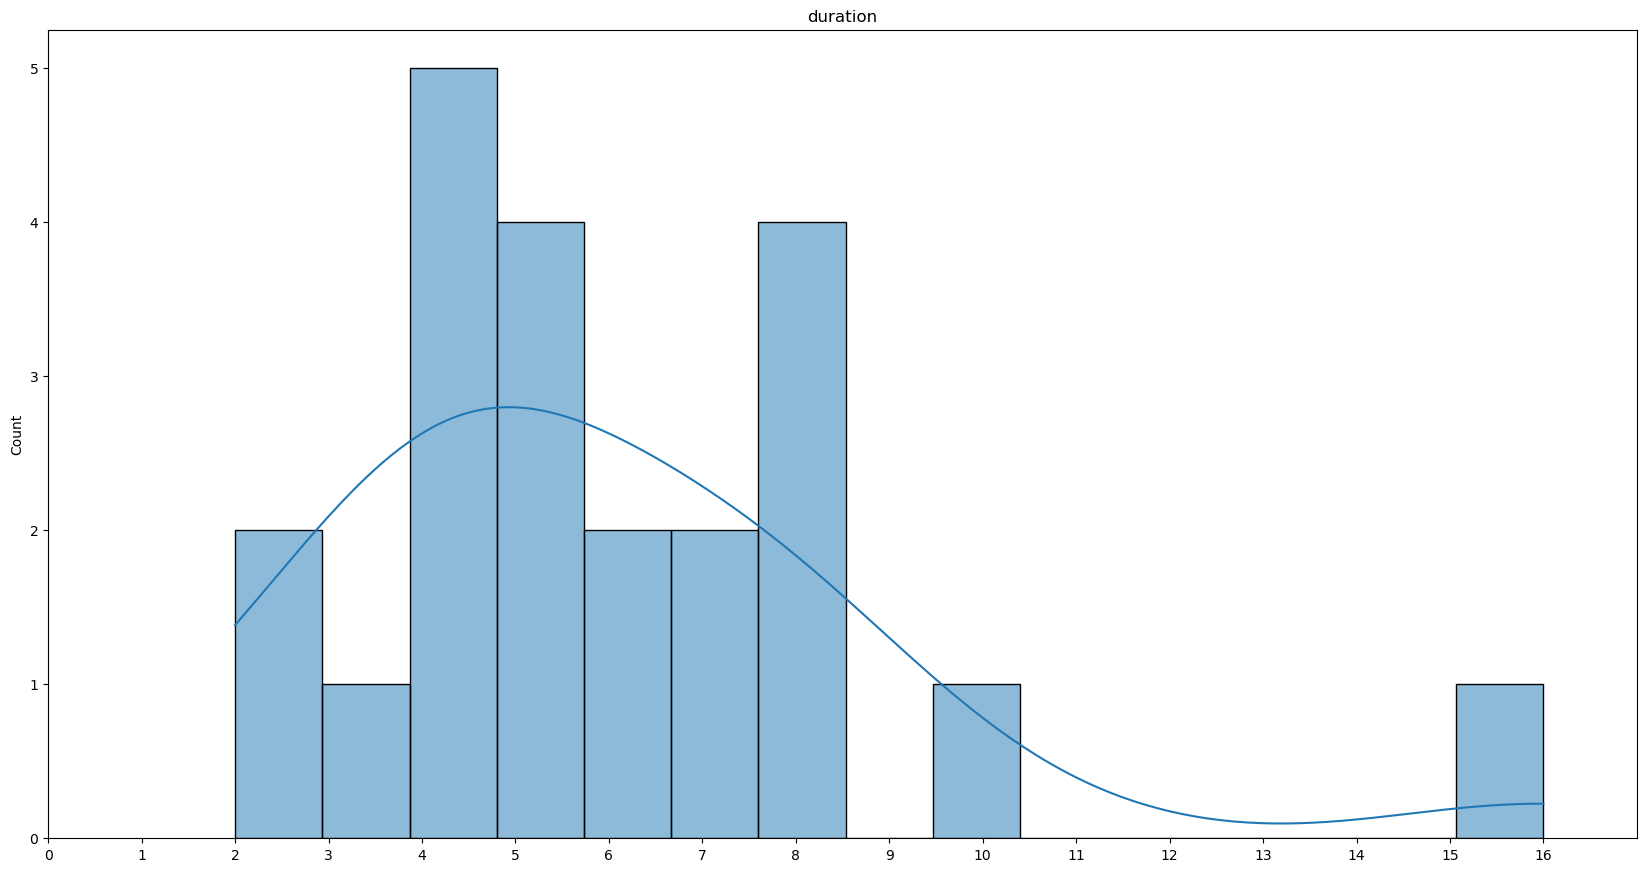

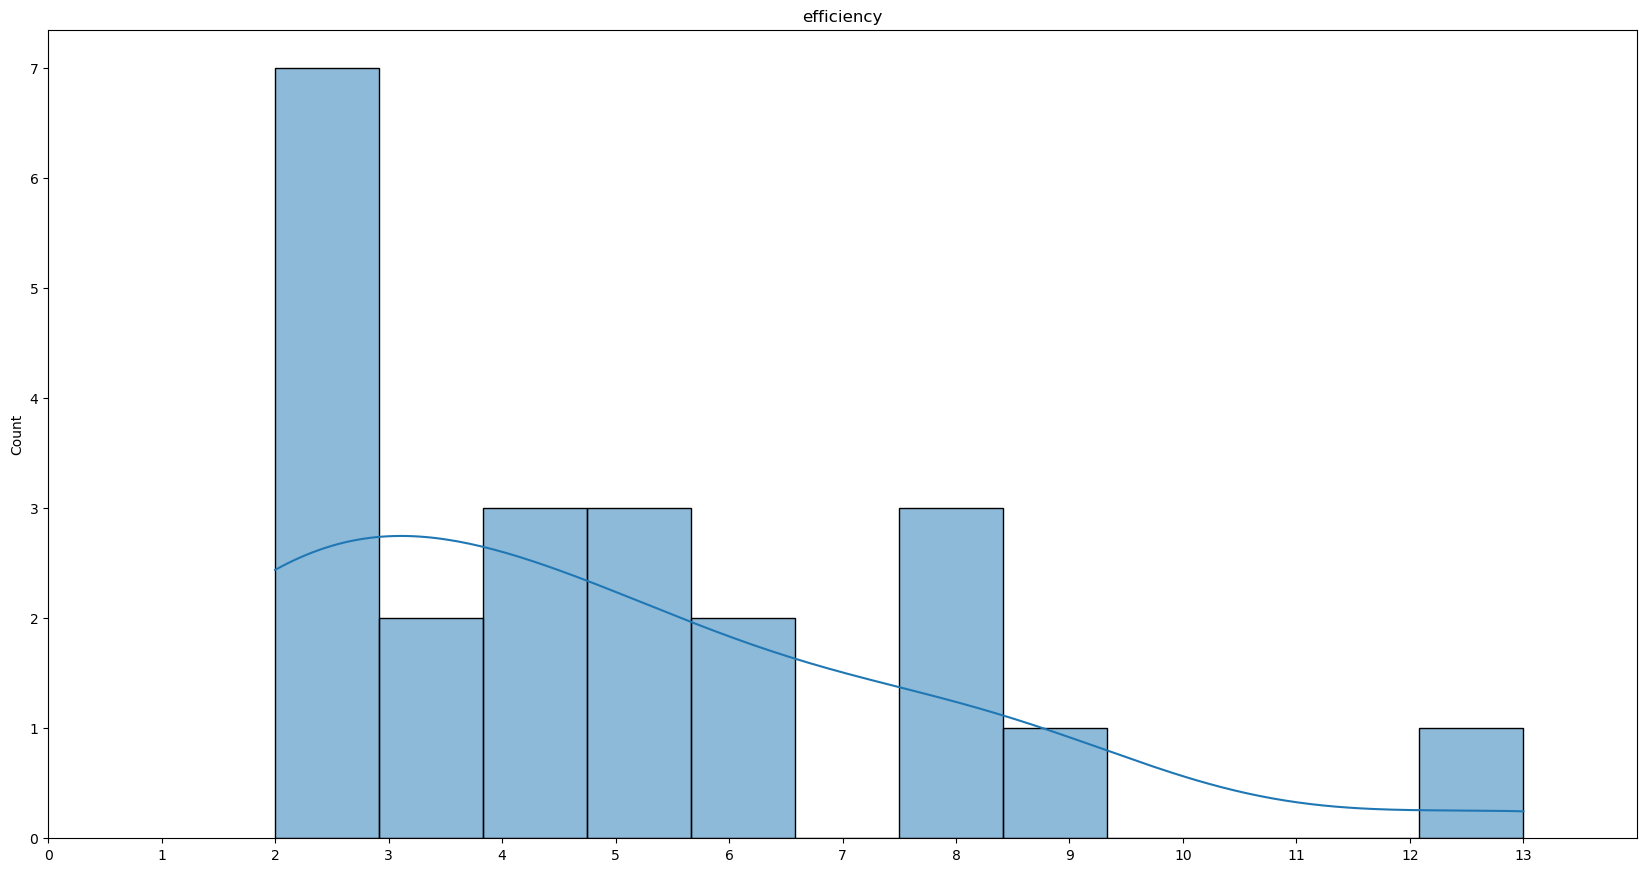

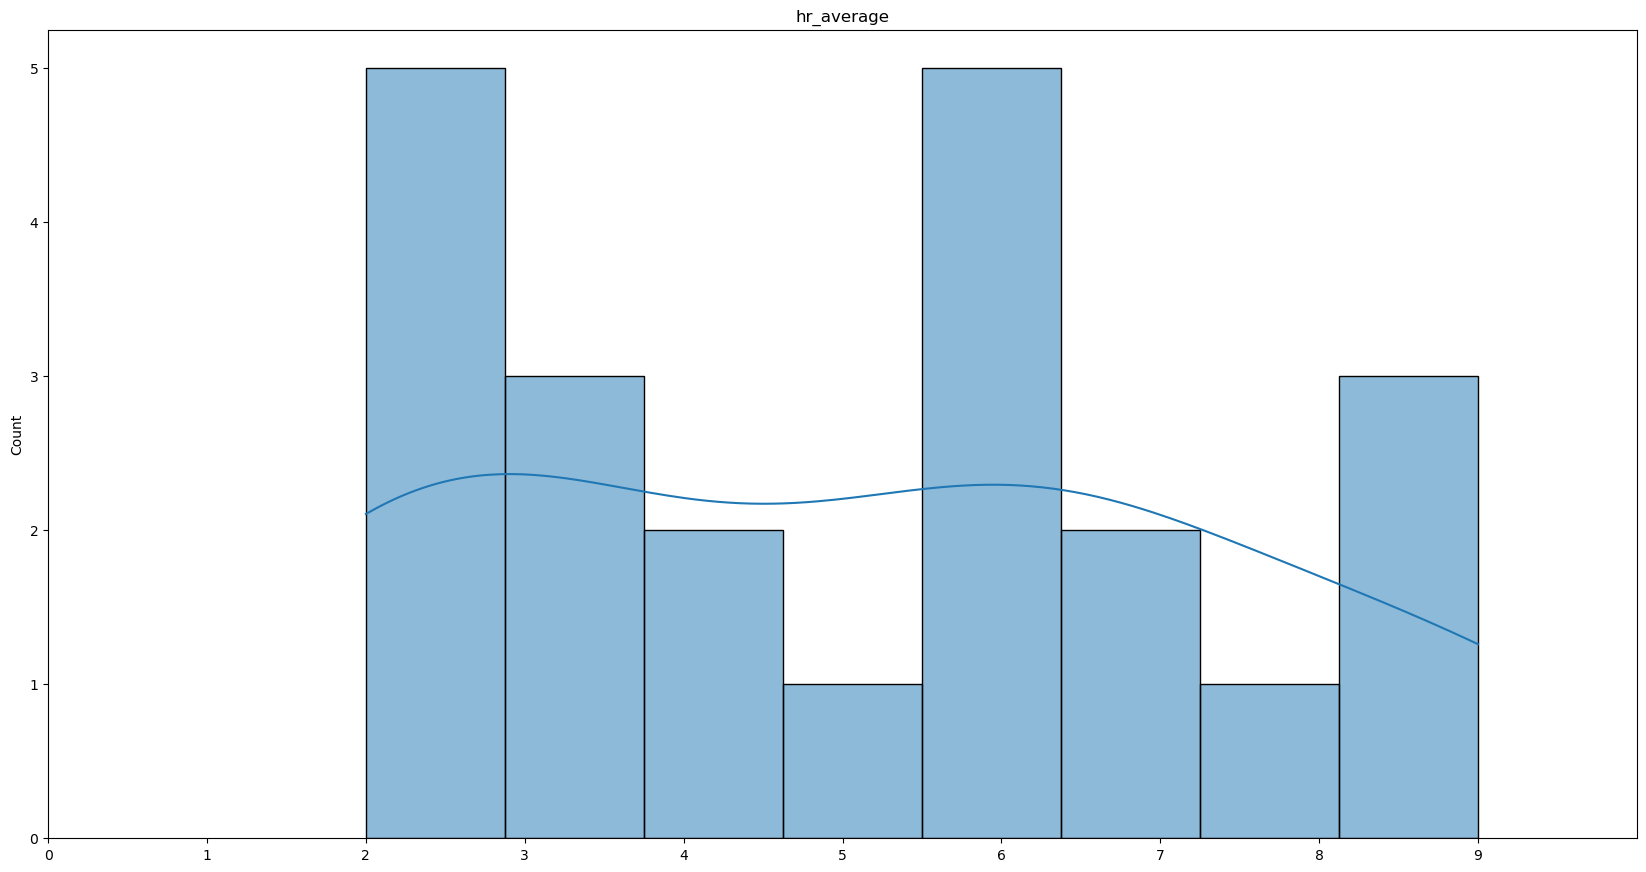

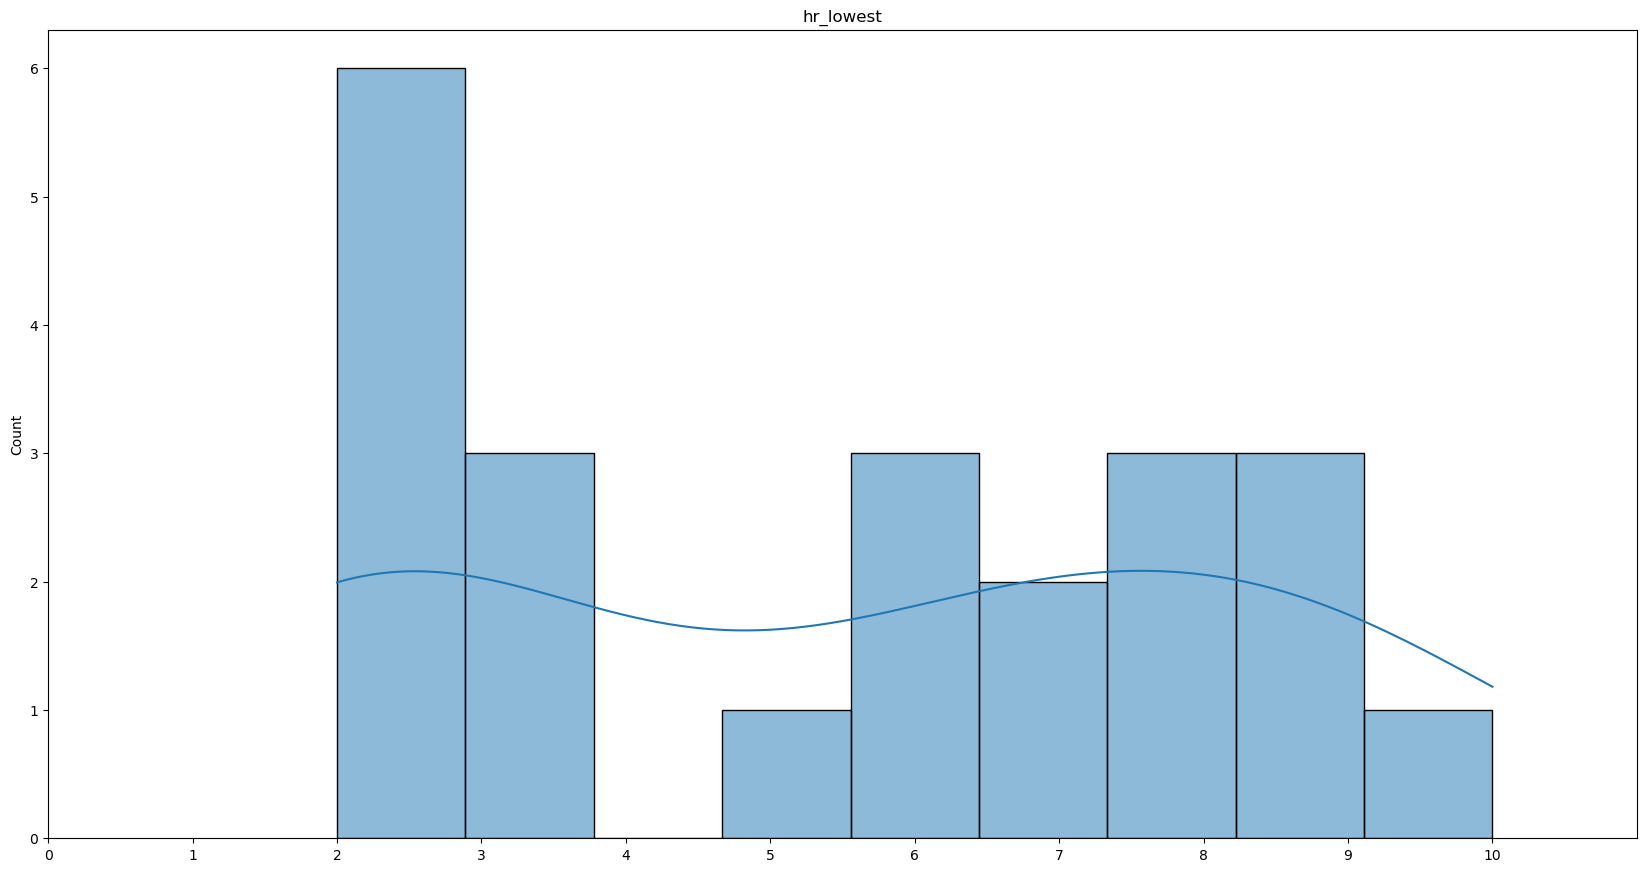

FileNotFoundError: [Errno 2] No such file or directory: '/repos/TiVaCPD/TiVaCPD/out2/bump_user_1704/light_mmd_score_0.pkl'

In [10]:
for feature in oura_sleep_list:
    feature_cp_lst = []
    for user_folder in os.listdir(rootdir):
        uid = float(user_folder.split('_')[2])
        dir = os.path.join(rootdir, user_folder)
        birth_info = birth_df.loc[birth_df['user_id'] == uid]
        birth_schedule = int(birth_info['birth_scheduled'].iloc[0])
        if birth_schedule == 2:
            filename = os.path.join(dir, f'{feature}_mmd_score_0.pkl')
            mmd_score = pickle.load(open(filename, 'rb'))
            peaks, _ = find_peaks(mmd_score)
            if len(peaks) > 0:
                last_peak = 60 - peaks[-1]
                feature_cp_lst.append(int(last_peak))
    max_val, min_val = max(feature_cp_lst) + 1, min(feature_cp_lst)
    bin_num = max_val - min_val
    fig, ax1 = plt.subplots()
    fig.set_size_inches(20.5, 10.5)
    ax = sns.histplot(feature_cp_lst, kde=True, bins=bin_num)
    ax.set_xticks(range(0, max_val))
    ax.set_xlim(0, max_val)
    plt.title(feature)
    plt.show()